# **Importing Libraries**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

# Setting display options
pd.set_option('display.max_columns', None)

# **Loading and Overview of the Dataset**

In [2]:
# Loading the dataset
dataset_path = 'bank_transactions_data_2.csv'
df = pd.read_csv(dataset_path)

# Displaying the first five rows of the dataset
print("First five rows of the dataset:")
display(df.head())

# Getting basic information about the dataset
print("\nDataset information:")
print(df.info())

# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
display(df.describe())

# Checking for duplicate entries
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

First five rows of the dataset:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Ac

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000



Number of duplicate rows:
0


# **Data Preprocessing**

In [3]:
# Converting date columns to datetime objects
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Extracting new features from date columns
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDay'] = df['TransactionDate'].dt.dayofweek  # Monday=0, Sunday=6

# Handling missing values (if any)
# Since there are no missing values, we proceed without imputations

# Checking for negative account balances
if (df['AccountBalance'] < 0).any():
    print("\nTransactions with negative account balance found.")
else:
    print("\nNo transactions with negative account balance.")


No transactions with negative account balance.


# **Exploratory Data Analysis (EDA)**

## **Plotting distributions of numerical variables**

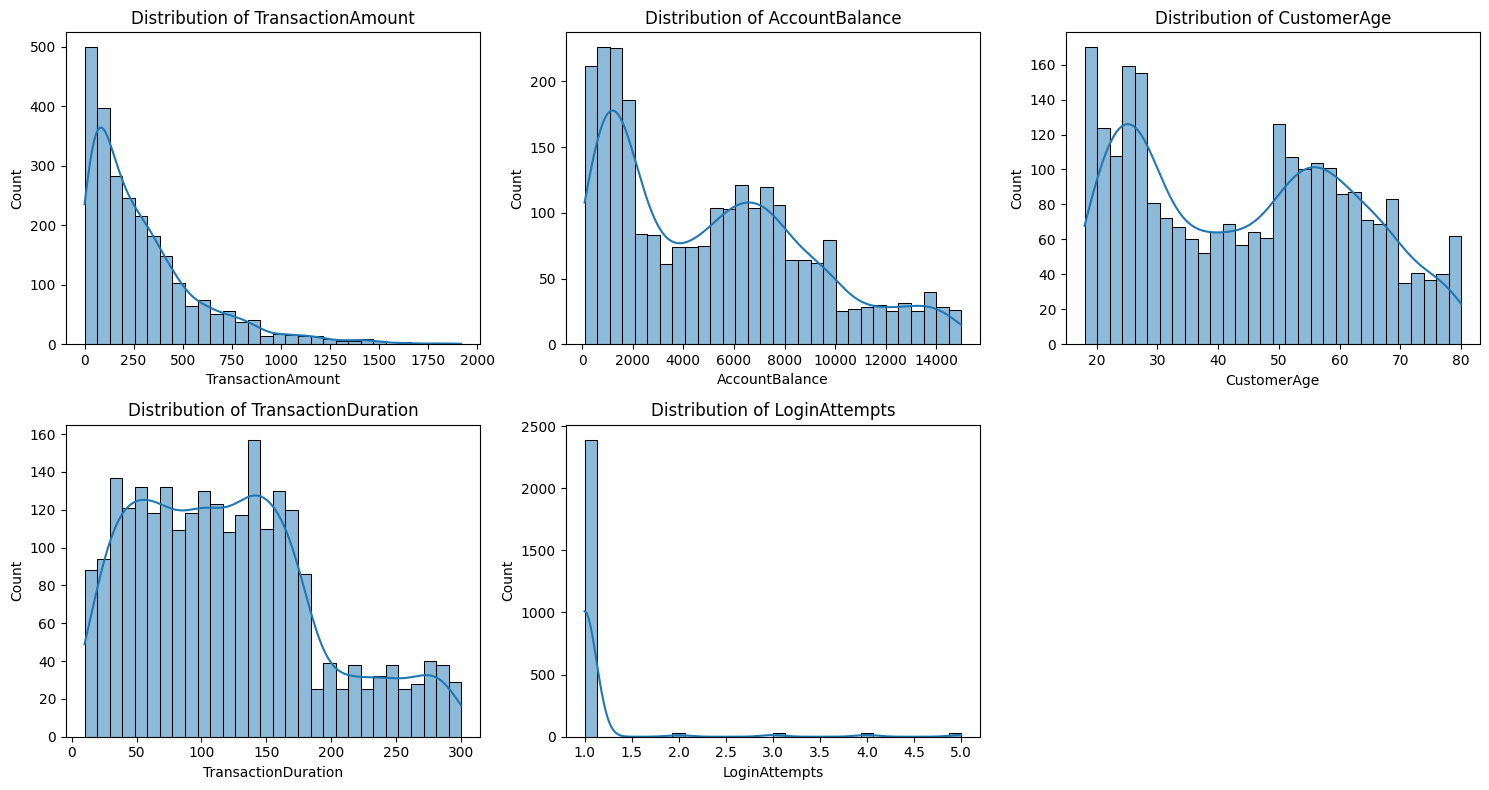

In [4]:
# Univariate Analysis: Plotting distributions of numerical variables
numerical_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## **Categorical Variables Analysis**

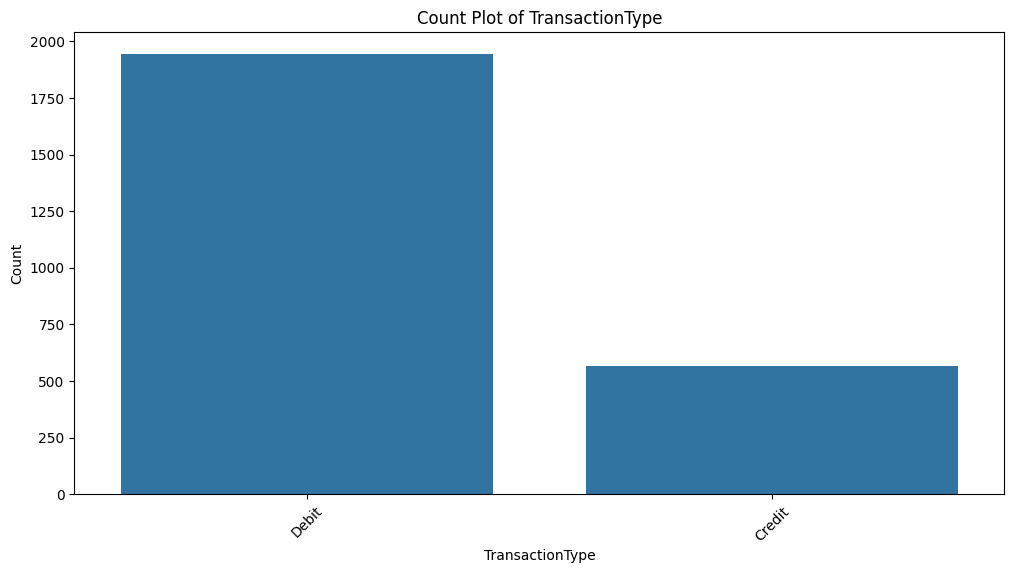

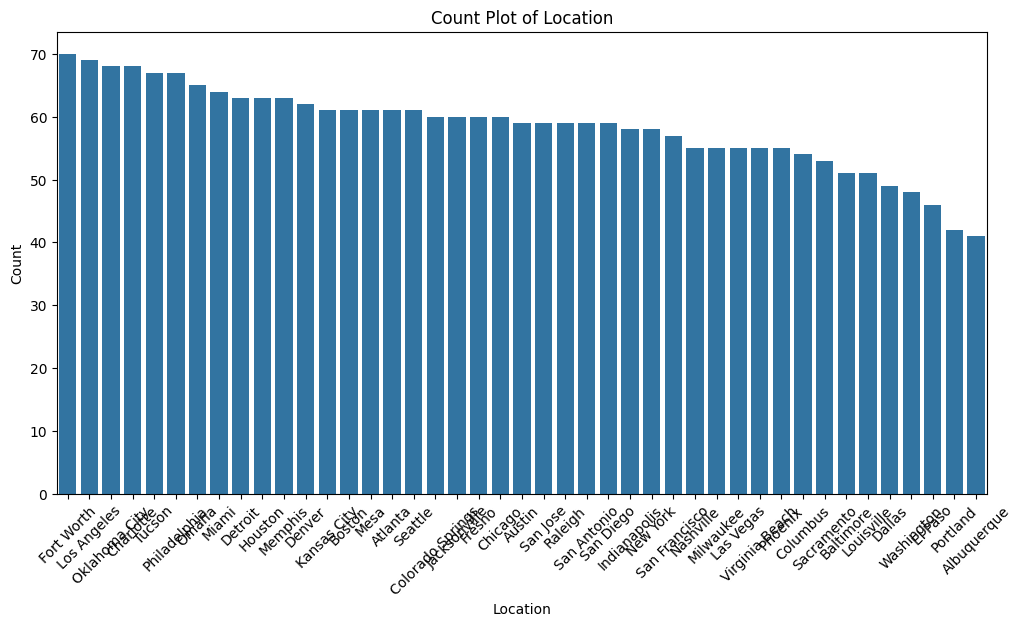

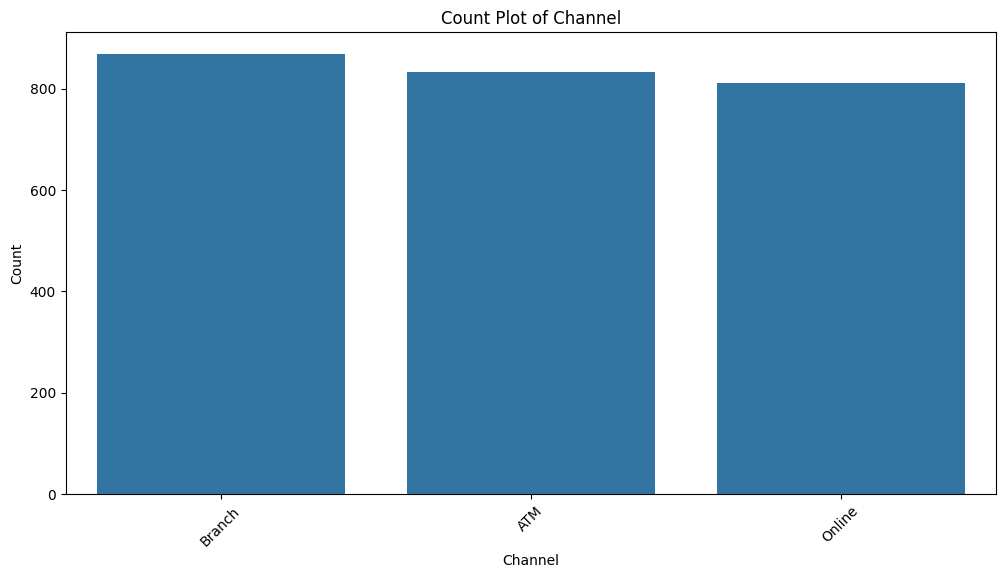

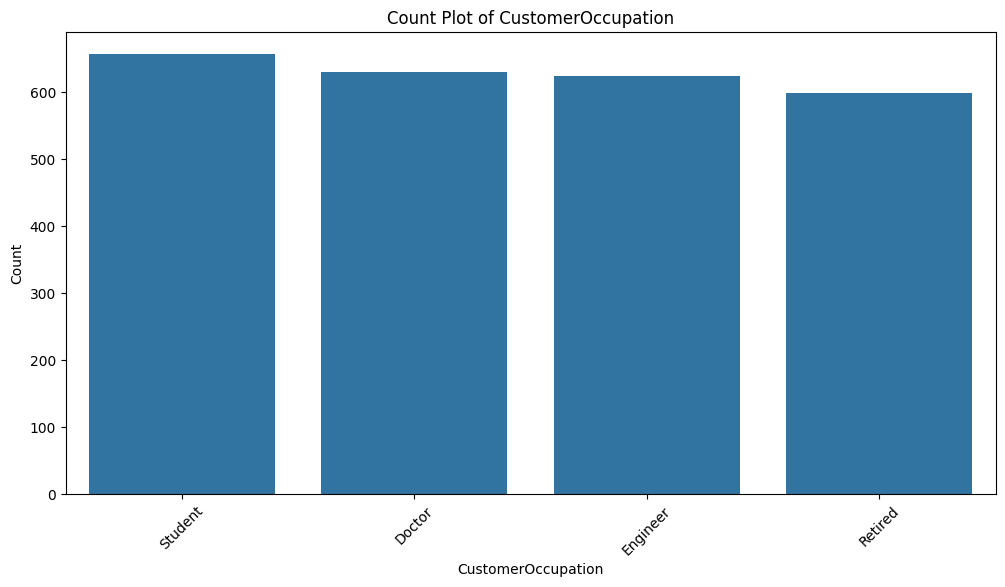

In [5]:
# Categorical Variables Analysis
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## **Correlation Matrix**

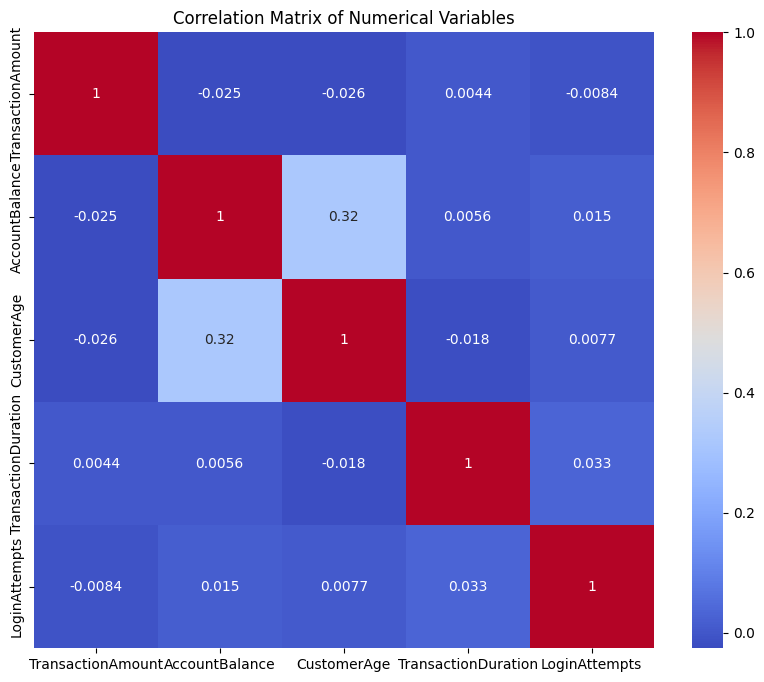

In [6]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## **Transaction Amount by Transaction Type**

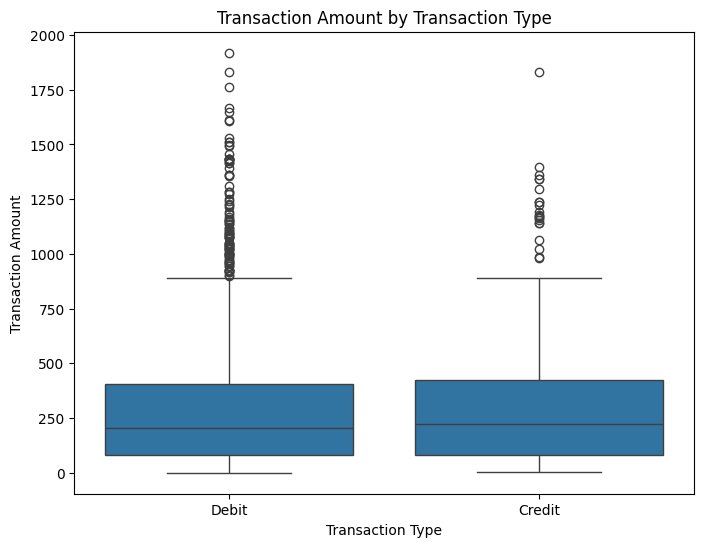

In [7]:
# Transaction Amount by Transaction Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

## **Number of Transactions by Hour of Day**

C:\Users\rakes\AppData\Local\Temp\ipykernel_2976\3355427699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionHour', data=df, palette='viridis')


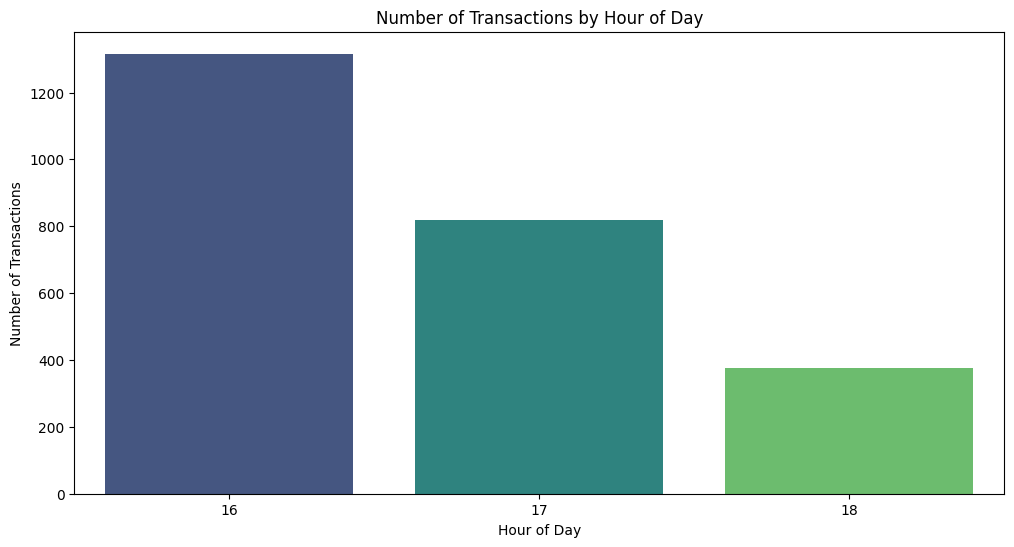

In [8]:
# Number of Transactions by Hour of Day
plt.figure(figsize=(12, 6))
sns.countplot(x='TransactionHour', data=df, palette='viridis')
plt.title('Number of Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

## **Number of Transactions by Day of Week**

C:\Users\rakes\AppData\Local\Temp\ipykernel_2976\895084038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionDay', data=df, palette='Set2')


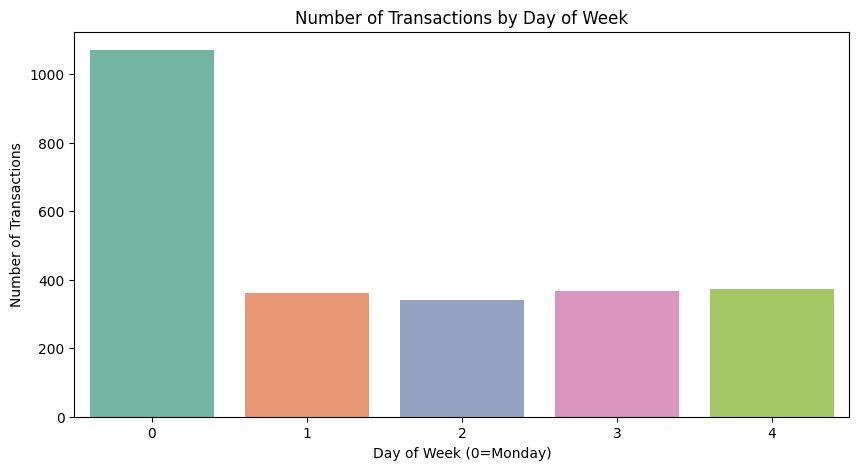

In [9]:
# Number of Transactions by Day of Week
plt.figure(figsize=(10, 5))
sns.countplot(x='TransactionDay', data=df, palette='Set2')
plt.title('Number of Transactions by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Number of Transactions')
plt.show()

## **Login Attempts vs Transaction Amount**

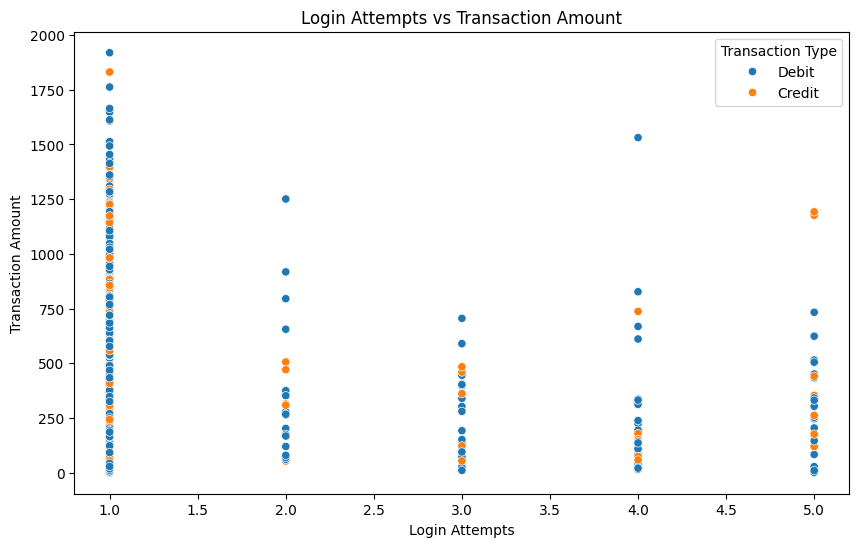

In [10]:
# Login Attempts vs Transaction Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LoginAttempts', y='TransactionAmount', hue='TransactionType', data=df)
plt.title('Login Attempts vs Transaction Amount')
plt.xlabel('Login Attempts')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Type')
plt.show()

## **Customer Age Distribution by Occupation**

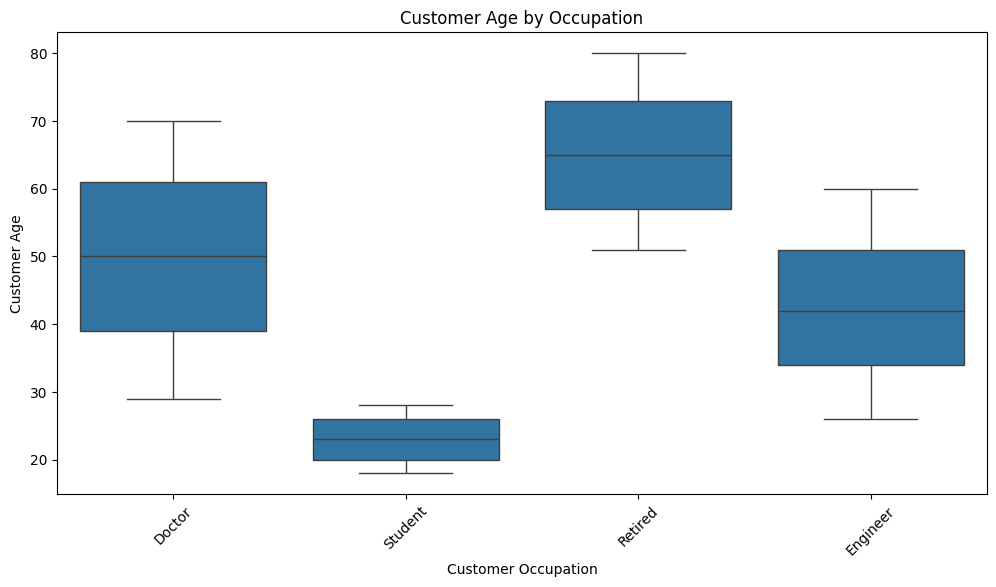

In [11]:
# Customer Age Distribution by Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='CustomerOccupation', y='CustomerAge', data=df)
plt.title('Customer Age by Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Customer Age')
plt.xticks(rotation=45)
plt.show()

## **Transaction Duration by Channel**

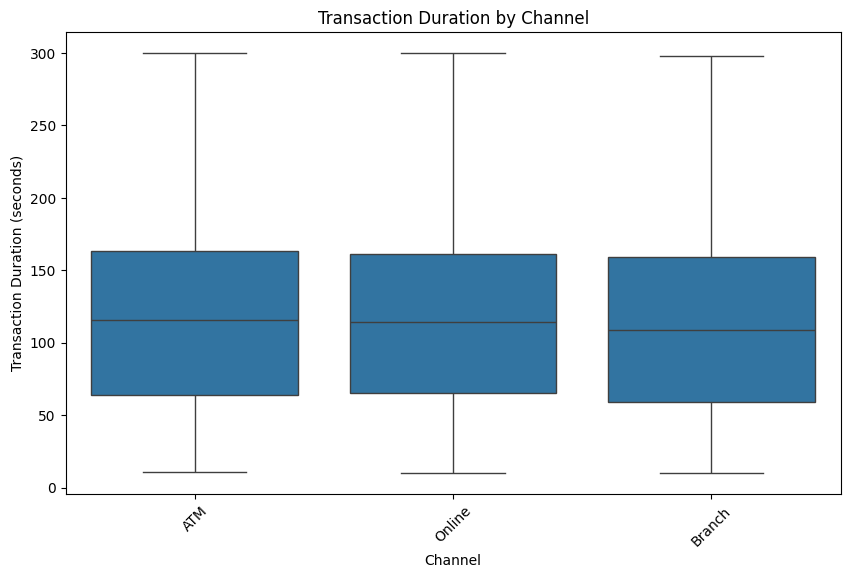

In [12]:
# Transaction Duration by Channel
plt.figure(figsize=(10, 6))
sns.boxplot(x='Channel', y='TransactionDuration', data=df)
plt.title('Transaction Duration by Channel')
plt.xlabel('Channel')
plt.ylabel('Transaction Duration (seconds)')
plt.xticks(rotation=45)
plt.show()

# **Feature Engineering**

In [13]:
# Encoding Categorical Variables using Label Encoding
label_encoder = LabelEncoder()
df['TransactionType_Enc'] = label_encoder.fit_transform(df['TransactionType'])
df['Channel_Enc'] = label_encoder.fit_transform(df['Channel'])
df['CustomerOccupation_Enc'] = label_encoder.fit_transform(df['CustomerOccupation'])

# Calculating Time Since Last Transaction
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()
df['TimeSinceLastTransaction'] = df['TimeSinceLastTransaction'].fillna(df['TimeSinceLastTransaction'].median())

# Creating Transaction Frequency Feature
transaction_counts = df.groupby('AccountID').size().reset_index(name='TransactionCount')
df = pd.merge(df, transaction_counts, on='AccountID', how='left')

# Dropping unnecessary columns for modeling
df_model = df.drop(['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID',
                    'IP Address', 'MerchantID', 'Channel', 'PreviousTransactionDate', 'CustomerOccupation'], axis=1)

# **Anomaly Detection using Isolation Forest**

Number of anomalies detected: 126


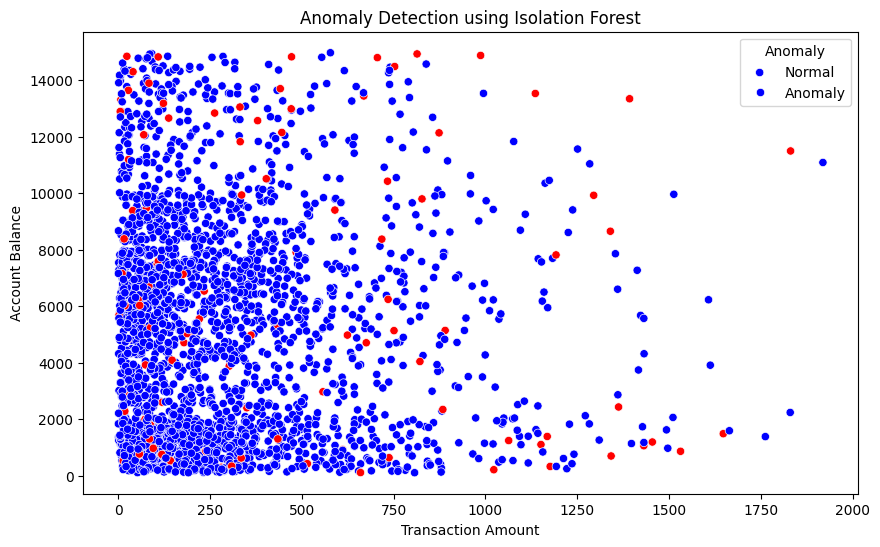

In [14]:
# Preparing data for anomaly detection
features = df_model.columns.drop(['Anomaly']) if 'Anomaly' in df_model.columns else df_model.columns
X = df_model[features]

# Initializing and fitting the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
isolation_forest.fit(X)

# Predicting anomalies
df['Anomaly'] = isolation_forest.predict(X)
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})

# Number of anomalies detected
print(f"Number of anomalies detected: {df['Anomaly'].sum()}")

# Visualizing anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', hue='Anomaly', palette={0: 'blue', 1: 'red'})
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

# **Predictive Modeling**

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       478
           1       0.81      0.52      0.63        25

    accuracy                           0.97       503
   macro avg       0.89      0.76      0.81       503
weighted avg       0.97      0.97      0.97       503



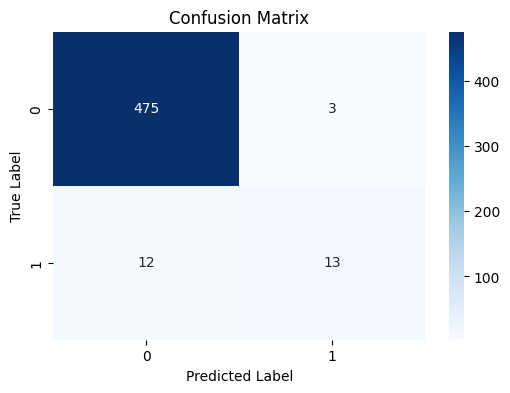

In [15]:
# Using anomalies detected by Isolation Forest as labels
X = df_model[features]
y = df['Anomaly']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Training a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Model Improvement and Hyperparameter Tuning**

In [16]:
# Hyperparameter tuning using GridSearchCV (optional)
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt']
}

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Evaluating the best estimator
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Classification Report with Best Estimator:")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Classification Report with Best Estimator:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       478
           1       0.81      0.52      0.63        25

    accuracy                           0.97       503
   macro avg       0.89      0.76      0.81       503
weighted avg       0.97      0.97      0.97       503

